## EXCERISES FROM LESSON 1

## Q3: Books 

Here is a list of book titles (from http://thegreatestbooks.org).  Loop through the list and capitalize each word in each title. 

In [1]:
titles = ["don quixote", 
          "in search of lost time", 
          "ulysses", 
          "the odyssey", 
          "war and piece", 
          "moby dick", 
          "the divine comedy", 
          "hamlet", 
          "the adventures of huckleberry finn", 
          "the great gatsby"]

print(f"Original titles: {titles}")

split_titles=[item.split() for item in titles] # Split titles in words
first_title_words=[item.split()[0] for item in titles] # Take only the first words of each title

index=0
for i in first_title_words:

    words_in_letters=list(i) # Transforms the first word of a title in a list of character

    words_in_letters[0]=words_in_letters[0].upper() # Substitute the lowercase letter with the uppercase letter
    # Old method: words_in_letters[0]=chr(ord(words_in_letters[0])-32) 
    # It takes the Unicode of the letter and tranforms it into the uppercase unicode of the same letter. Finally it transforms it into a char


    new_word="".join(words_in_letters) # Transform the list of letters into the new first word of the title
    split_titles[index][0]=new_word # Substitute the "index" title first word "[0]" with the new word
    index+=1


# Loop to join the the split titles into a single string containing the title
new_titles=[]
for k in split_titles:
    new_titles.append(" ".join(k))

print(f"New titles: {new_titles}")

Original titles: ['don quixote', 'in search of lost time', 'ulysses', 'the odyssey', 'war and piece', 'moby dick', 'the divine comedy', 'hamlet', 'the adventures of huckleberry finn', 'the great gatsby']
New titles: ['Don quixote', 'In search of lost time', 'Ulysses', 'The odyssey', 'War and piece', 'Moby dick', 'The divine comedy', 'Hamlet', 'The adventures of huckleberry finn', 'The great gatsby']


## Q5: Foxes and dogs

### Part 1. Short words

Let's practice functions. Here's a simple function that takes a string and returns a list of all the 4 letter words:

In [2]:
def four_letter_words(message):
    words = message.split()
    four_letters = [w for w in words if len(w) == 4]
    return four_letters

message = "The quick brown fox jumps over the lazy dog"
print(four_letter_words(message))

['over', 'lazy']


Write a version of this function that takes a second argument, n, that is the word length we want to search for

In [3]:
def n_letter_words(message, n):
    words = message.split()
    n_letters = [w for w in words if len(w) == n]
    return n_letters

message = "Un pollo ha mangiato un cane che ha mangiato un uccello che ha mangiato un computer che al mercato mio padre comprò"
print(n_letter_words(message,7))

['uccello', 'mercato']


### Part 2: Panagrams

A _panagram_ is a sentence that includes all 26 letters of the alphabet, e.g., "_The quick brown fox jumps over the lazy dog_."

Write a function that takes as an argument a sentence and returns `True` or `False`, indicating whether the sentence is a panagram.

In [4]:
def is_panagram(message):
    # All letters of the message are converted into lowercase letters and the punctuation is removed.
    letters_lowercase = [x for x in message.lower().replace(" ","").replace(",","").replace(".","")] 

    panagram=True
    for i in range(97,122): # 97 to 122 is the Unicode of all lowercase letters of the alphabet
        letter_presence = chr(i) in letters_lowercase

        if letter_presence == False:
            panagram=False
            break

    return panagram            


message = "The quick brown fox jumps over the lazy dog"
print(f"The message is:\n{message}", f"\n\nIs the message a panagram? {is_panagram(message)}")

The message is:
The quick brown fox jumps over the lazy dog 

Is the message a panagram? True


# Q7: Tic-tac-toe

Here we'll write a simple tic-tac-toe game that 2 players can play.

In [5]:
from IPython.display import clear_output

board = """
 {s1:^3} | {s2:^3} | {s3:^3}
-----+-----+-----
 {s4:^3} | {s5:^3} | {s6:^3}
-----+-----+-----      123
 {s7:^3} | {s8:^3} | {s9:^3}       456
                       789  
"""

def initialize_board(play):
    for n in range(9):
        play["s{}".format(n+1)] = ""

def show_board(play):
    """ display the playing board.  We take a dictionary with the current state of the board
    We rely on the board string to be a global variable"""
    print(" TIC-TAC-TOE GAME" , "\n", "Player 1: symbol 'x'; Player 2: symbol 'o'")
    print(board.format(**play))

def get_move(n, xo, play):
    """ ask the current player, n, to make a move -- make sure the square was not 
        already played.  xo is a string of the character (x or o) we will place in
        the desired square """
    valid_move = False
    while not valid_move:
        idx = input("Player {}, enter your move (1-9): ".format(n))

        # Test if the input is an integer
        try:
            idx = int(idx)

            # Verify that the integer is between 1 and 9
            if idx < 1 or idx > 9:
                valid_move = False
                print("Invalid move, type an integer number between 1 and 9.")
            else:
                valid_move = True

        except ValueError:
            print("Invalid move, type an integer number between 1 and 9.")


        if valid_move == True:

            if play["s{}".format(idx)] == "":
                play["s{}".format(idx)] = xo
            else:
                print("Invalid, that cell is already occupied.")
                valid_move = False

def victory_move(xo, play):

    winning_moves = [(1,2,3), (4,5,6), (7,8,9), (1,5,9), (3,5,7), (1,4,7), (2,5,8), (3,6,9)]

    victory = False

    # Loop over the different winning moves
    for i in winning_moves:
        
        # Loop over the necessary position to win the game
        for k in range(0,3):

            # If there is the same symbol thrice, then it's a win
            if play[f"s{i[k]}"]==xo:
                victory = True
            else: 
                victory = False
                break

        if victory == True:
            break

    return victory

def play_game():
    """ play a game of tic-tac-toe """
    
    play ={}
    initialize_board(play)
    show_board(play)

    n = [0, 1]
    symb=['x', 'o']
    alt = 0
    victory=False

    for moves in range(9): 

        # The player move is taken as an input  
        get_move(n[alt], symb[alt], play)

        # Clearing output board after each move
        clear_output()
        
        # The updated board is displayed
        show_board(play) 

        # Verify if one of the player won
        victory = victory_move(symb[alt], play)
        if victory == True:
            break

        # Player change
        if alt == 0:
            alt = 1
        else:
            alt = 0 
    8
    # Game result is printed out
    if victory == True:
        print(f"Player {n[alt]+1} (symbol '{symb[alt]}') wins!")
    else:
        print("Tie!")

play_game()

 TIC-TAC-TOE GAME 
 Player 1: symbol 'x'; Player 2: symbol 'o'

  x  |  o  |  x 
-----+-----+-----
  o  |  x  |  o 
-----+-----+-----      123
  x  |     |           456
                       789  

Player 1 (symbol 'x') wins!


## EXCERISES FROM LESSON 2

## Q2: Edges

Create a 2d array with `1` on the border and `0` on the inside, e.g., like:
```
1 1 1 1 1
1 0 0 0 1
1 0 0 0 1
1 1 1 1 1
```

Do this using array slice notation to let it work for an arbitrary-sized array

In [6]:
import numpy as np

rows=5
columns=4
a=np.ones((rows,columns)) # Create a one-only matrix

a[1:-1,1:-1]=0 # Leave ones only on the edges of the matrix
print(f"a:\n{a}")

a:
[[1. 1. 1. 1.]
 [1. 0. 0. 1.]
 [1. 0. 0. 1.]
 [1. 0. 0. 1.]
 [1. 1. 1. 1.]]


## Q3: Histrograms

Here we will read in columns of numbers from a file and create a histogram, using NumPy routines.  Make sure you have the data file
"`sample.txt`" in the same directory as this notebook (you can download it from  https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-3/sample.txt

  * Use `np.loadtxt()` to read this file in.  

  * Next, use `np.histogram()` to create a histogram array.  The output returns both the count and an array of edges.
  
  * Finally, loop over the bins and print out the bin center (averaging the left and right edges of the bin) and the count for that bin.

In [8]:
import numpy as np

data = np.loadtxt("sample.txt")

counts, edges= np.histogram(data)

centers=np.zeros(len(counts))

for i in range(len(edges)-1):

    centers[i] = edges[i]+ (edges[i+1]-edges[i])/2 
    print(f"The bin center is in {centers[i]} and the counts for that bin is {counts[i]}")

The bin center is in -24.109006493430737 and the counts for that bin is 6
The bin center is in -11.150163704648554 and the counts for that bin is 23
The bin center is in 1.8086790841336278 and the counts for that bin is 52
The bin center is in 14.767521872915811 and the counts for that bin is 37
The bin center is in 27.726364661697996 and the counts for that bin is 16
The bin center is in 40.68520745048018 and the counts for that bin is 14
The bin center is in 53.64405023926236 and the counts for that bin is 13
The bin center is in 66.60289302804455 and the counts for that bin is 13
The bin center is in 79.56173581682673 and the counts for that bin is 13
The bin center is in 92.5205786056089 and the counts for that bin is 13


## Q4: Are you faster than numpy?

Numpy of course has a standard deviation function, `np.std()`, but here we'll write our own that works on a 1-d array (vector).  The standard
deviation is a measure of the "width" of the distribution of numbers
in the vector.

Given an array, $a$, and an average $\bar{a}$, the standard deviation
is:
$$
\sigma = \left [ \frac{1}{N} \sum_{i=1}^N (a_i - \bar{a})^2 \right ]^{1/2}
$$

Write a function to calculate the standard deviation for an input array, `a`:

  * First compute the average of the elements in `a` to define $\bar{a}$
  * Next compute the sum over the squares of $a - \bar{a}$
  * Then divide the sum by the number of elements in the array
  * Finally take the square root (you can use `np.sqrt()`)
  
Test your function on a random array, and compare to the built-in `np.std()`. Check the runtime as well.

In [9]:
import numpy as np
import random
import time

N = 100000000 # Number of array elements

# My standard deviation
t0_mine = time.time()
a = np.random.uniform(size = N, low = 1, high = 50) # Generation of a random array
a_mean = np.mean(a) # mean a value
dev_std_mine = np.sqrt( np.sum([(x-a_mean)**2 for x in a])/N ) 
t1_mine = time.time()

# Numpy standard deviation
t0_np = time.time()
dev_std_np = np.std(a)
t1_np = time.time()

print(f"This is the my standard deviation: {dev_std_mine}. {round((t1_mine-t0_mine),5)} seconds have elapsed.")
print(f"This is the numpy standard deviation: {dev_std_np}. {round((t1_np-t0_np),5)} seconds have elapsed.")

This is the my standard deviation: 14.144986740388243. 25.64257 seconds have elapsed.
This is the numpy standard deviation: 14.144986740388243. 0.55649 seconds have elapsed.


## EXCERISES FROM LESSON 3

## Q2: Planetary positions

  * Plot as points, the periods vs. distances for each planet on a log-log plot.

  * Write the name of the planet next to the point for that planet on the plot

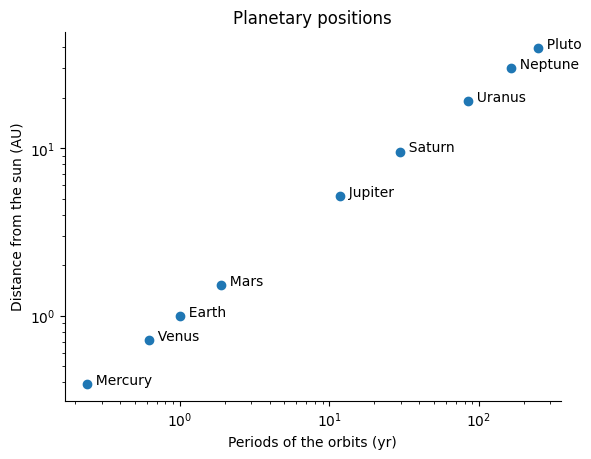

In [10]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xscale("log")
ax.set_yscale("log")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Periods of the orbits (yr)')
ax.set_ylabel('Distance from the sun (AU)')
ax.set_title('Planetary positions')

a = np.array([0.39, 0.72, 1.00, 1.52, 5.20, 9.54, 19.22, 30.06, 39.48])
P = np.array([0.24, 0.62, 1.00, 1.88, 11.86, 29.46, 84.01, 164.8, 248.09])

names = ["Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", 
         "Uranus", "Neptune", "Pluto"]

plt.scatter(P,a)
for i in range(len(a)):
    ax.text(P[i], a[i], "  " + names[i])    

## Q3: A perfect circle

For an angle $\theta$ in the range $\theta \in [0, 2\pi]$, the polar equations of a circle of radius $R$ are:

$$x = R\cos(\theta)$$

$$y = R\sin(\theta)$$

We want to draw a circle.   

  * Create an array to hold the theta values&mdash;the more we use, the smoother the circle will be
  * Create `x` and `y` arrays from `theta` for your choice of $R$
  * Plot `y` vs. `x`
  
Now, look up the matplotlib `fill()` function, and draw a circle filled in with a solid color.

Generalize your circle drawing commands to produce a function, 
```
draw_circle(x0, y0, R, color)
```
that draws the circle.  Here, `(x0, y0)` is the center of the circle, `R` is the radius, and `color` is the color of the circle.  

Now randomly draw 10 circles at different locations, with random radii, and random colors on the same plot.

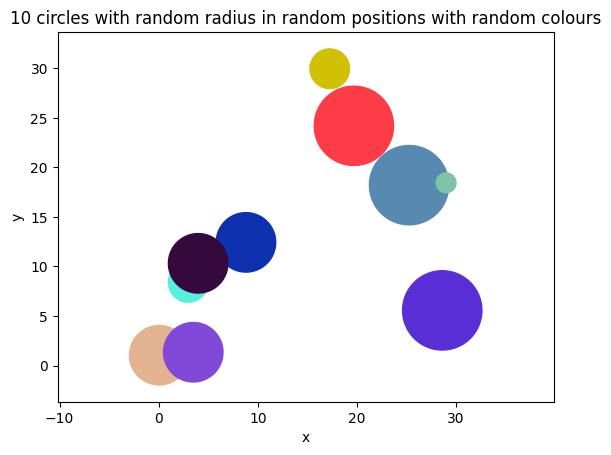

In [11]:
import random
import matplotlib.pyplot as plt
import numpy as np

def draw_circle(x0,y0,R,colour,ax):
    N = 400
    theta = np.linspace(0,2*np.pi,N)
    x = x0+R*np.cos(theta)
    y = y0+R*np.sin(theta)

    ax.fill(x, y, c=colour)

Numb=10 # Number of circles

fig = plt.figure()
ax = fig.add_subplot(111)
ax.axis("equal")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title(f"{Numb} circles with random radius in random positions with random colours")

for i in range(Numb):
    colour = [random.random() for i in range(3)] 
    x0 = np.random.uniform(0, 30.0) 
    y0 = np.random.uniform(0, 30.0) 
    R = random.randint(1, 4.0) 

    draw_circle(x0,y0,R,colour,ax)

## Q4: Climate

Download the data file of global surface air temperature averages from here:
https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-4/nasa-giss.txt
This data comes from: https://data.giss.nasa.gov/gistemp/graphs/

(Don't ask, of course you can download data straight from python! The library is called `urllib`)

There are 3 columns here: the year, the temperature change, and a smoothed representation of the temperature change.  

  * Read in this data using `np.loadtxt()`.  
  * Plot as a line the smoothed representation of the temperature changes.  
  * Plot as points the temperature change (no smoothing).  Color the points blue if they are < 0 and color them red if they are >= 0
  
You might find the numpy `where()` function useful.

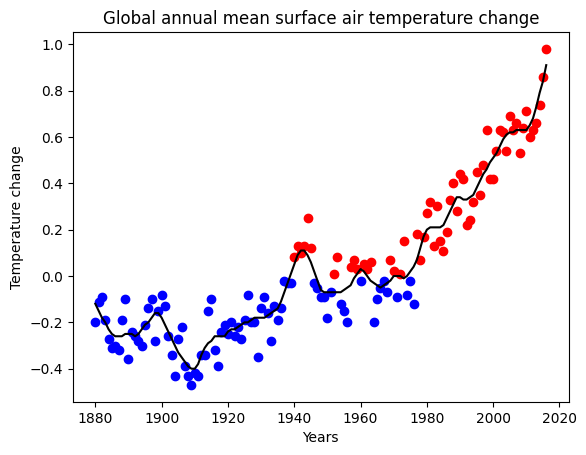

In [12]:
from urllib import request
import matplotlib.pyplot as plt

URL = 'https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-4/nasa-giss.txt'

file = request.urlopen(URL) # Downloading file
data = np.loadtxt(file) # Loading file

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Years")
ax.set_ylabel("Temperature change")
ax.set_title("Global annual mean surface air temperature change")

red_points = np.where(data[:,1]>=0)
blue_points = np.where(data[:,1]<0)

# Plot as points of the temperature change
ax.scatter(data[red_points,0], data[red_points,1], c='red') 
ax.scatter(data[blue_points,0], data[blue_points,1],c='blue') 

# Plot of the smoothed representation of the temperature change
ax.plot(data[:,0], data[:,2], c='black')

## EXCERISES FROM LESSON 4

## Q2: Interpolation error

There are a large number of different interpolation schemes available through scipy.  Let's test them out.

Create a python function, $f(x)$, that is your true function (make it complicated!).  Now create $N$ samples of it (either regularly spaced or irregularly spaced).

Try some of the different interolation routines.  `interpolate.interp1d` takes a `kind` argument that let's you choose the order of the interpolation.  Measure the error in the method, by comparing the interpolated result with the actual function value.  

Then do the same cubic splines (look at `CubicSpline`)

Plot the resulting interpolant.

The interpolation error is: 2.3742633969980886e-09
The interpolation error (CubicSpline) is: 1.862645149230957e-09


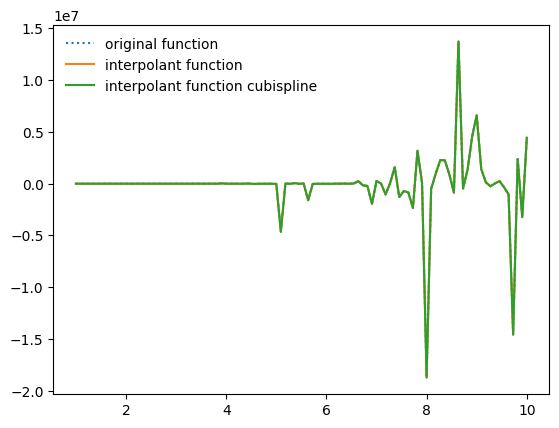

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate

def f(x):
    return (x**3*np.exp(x)*np.sin(x)**2/np.tan(x**3))


N = 100
x = np.linspace(1, 10, N)
y = f(x)

f_interp = interpolate.interp1d(x,y, kind="cubic")
f_interp_cubiscspline = interpolate.CubicSpline(x,y)

fig, ax = plt.subplots()

ax.plot(x, y, ls=":", label="original function")
ax.plot(x, f_interp(x), label="interpolant function")
ax.plot(x, f_interp_cubiscspline(x), label="interpolant function cubispline")
ax.legend(frameon=False, loc="best")

error = abs(sum(f_interp(x)-y))
error_cubicspline = abs(sum(f_interp_cubiscspline(x)-y))
print(f"The interpolation error is: {error}")
print(f"The interpolation error (CubicSpline) is: {error_cubicspline}")

## Q3: Basins of attraction

Consider the function

$$q(x) = x^3 - 2x^2 - 11x + 12$$

This has 3 roots has you should find them all. This equation is known to cause problems for some root-finding methods  becauses it exhibits [basis of attraction](https://en.wikipedia.org/wiki/Newton%27s_method#Basins_of_attraction) -- very closely spaced initial guesses leave to very different roots.

Use the scipy `optimize.brentq` method to find the roots.  You might need to play around with the intervals to find all 3 roots (try plotting the function to help)

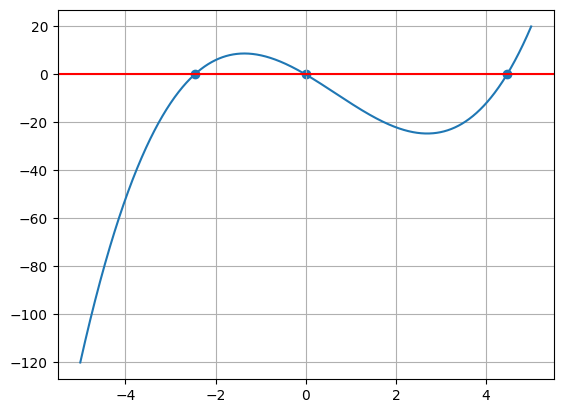

In [14]:
from scipy import optimize

N = 1000
x = np.linspace(-5, 5, N)

def f(x):
    return (x**3-2*x**2-11*x)

fig, ax = plt.subplots()
ax.plot(x,f(x))
ax.grid()
ax.axhline(y=0, color='r', linestyle='-')

root1,r1=optimize.brentq(f,-3,-1,full_output=True)
root2,r2=optimize.brentq(f,-1,1,full_output=True)
root3,r3=optimize.brentq(f,2,5,full_output=True)

ax.scatter([root1, root2, root3], [f(root1), f(root2), f(root3)])

## Q7: Noisy signal

A convolution is defined as:  

  \begin{equation}                                                                           
    (f \star g)(t) \equiv \int_{-\infty}^{\infty} f(\tau) g(t - \tau) d\tau                   
  \end{equation}                                                                             

  It is easy to compute this with FFTs, via the _convolution theorem_,                                                                        
  \begin{equation}                                         
    \mathcal{F}\{f \star g\} = \mathcal{F}\{f\} \, \mathcal{F}\{g\}                                          
  \end{equation}                                         
  That is: the Fourier transform of the convolution of $f$ and $g$ is simply
  the product of the individual transforms of $f$ and $g$.  This allows us
  to compute the convolution via multiplication in Fourier space and then take
  the inverse transform, $\mathcal{F}^{-1}\{\}$, to recover the convolution in real space:
  
  \begin{equation}
  f \star g = \mathcal{F}^{-1}\{ \mathcal{F}\{f\} \, \mathcal{F}\{g\}\}
  \end{equation}
  
A common use of a convolution is to smooth noisy data, for example by convolving noisy data with a my_gaussian.  We'll do that here.

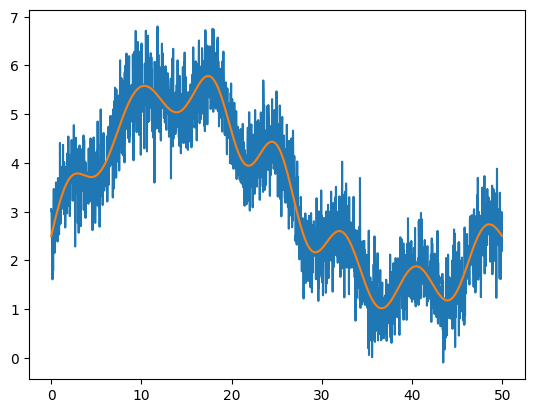

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def fdata(x, L):
    A = L/10.0
    return 2*np.sin(2*np.pi*x/L) + x*(L-x)**2/L**3 * np.cos(x) + \
           5*x*(L-x)/L**2 + A/2 + 0.1*A*np.sin(13*np.pi*x/L)

N = 2048
L = 50.0
x = np.linspace(0, L, N, endpoint=False)
orig = fdata(x, L)
noisy = orig + 0.5*np.random.randn(N)

plt.plot(x, noisy)
plt.plot(x, orig)

SciPy provides a convolution function `scipy.signal.convolve()` that can do the convolution for us directly.  To smooth the data, we want to use a my_gaussian, which can be produced by `scipy.signal.my_gaussian()`.

Convolve the noisy data with a my_gaussian and plot the result together with the original data `orig`.  You'll need to play with the width of the my_gaussian to get a nice smoothing.  You also will need to normalize the my_gaussian so that it sums to 1, otherwise, your convolved data will be shifted verfically from the original function.

/tmp/ipykernel_363027/4108095289.py:8: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated since SciPy 1.1.0 and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  my_gaussian=signal.gaussian(numb_of_points,my_std,my_sym)


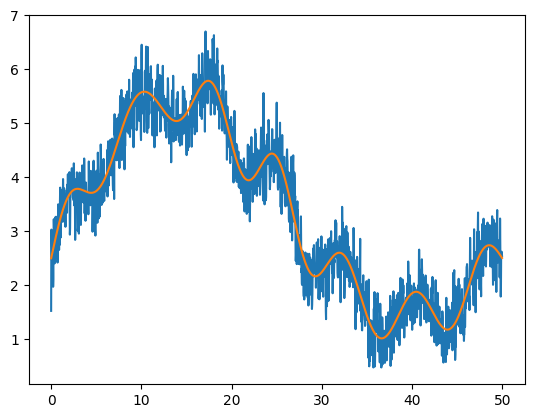

In [16]:
from scipy import integrate
from scipy import signal

numb_of_points=N
my_std=0.02
my_sym=True

my_gaussian=signal.gaussian(numb_of_points,my_std,my_sym)
my_gaussian_norm=my_gaussian/sum(my_gaussian)

fig, ax = plt.subplots()

convolution=signal.convolve(noisy,my_gaussian_norm,mode='same') # mode same to have the same input number of points in the output

ax.plot(x, convolution)
ax.plot(x, orig)

## EXCERISES FROM LESSON 5

Exercises from lesson 5 are in the "L05_exercises.nb" file

## EXCERISES FROM LESSON 6

## Q2: Egocentric

Write a github action that lets you commit only if README.md contains your name.

I wrote this action on github:

```
name: Exercise number 2
run-name: ${{ github.actor }} is testing out exercise number 2
on: [push]
jobs:
  Reading_my_name:
    runs-on: ubuntu-latest
    steps:
      - name: Check out repository code
        uses: actions/checkout@v4
        
      - name: Verify if there is my name in README.md
        run: |
          USERNAME="${{ github.actor }}"
          if grep -q $USERNAME README.md; then
            echo "Nice, you wrote your name in README.md"
          else
            echo "You did not write your name in README.md!"
            exit 1
          fi
      - run: echo "🍏 This job's status is ${{ job.status }}."
```

## Q4: You're wrong

Find a bug/typo in the material of this course, fix it, and send me a pull request.

I sent you a pull request on some typos and some other stuff and you merged it on the 6th of April

## EXCERISES FROM LESSON 7

## Q1: The stock market

(This is about numba)

A Markov Chain is defined as a sequence of random variables where a parameter depends *only* on the preceding value. This is a crucial tool in statistics, widely used in science and beyond (economics for instance).

For instance, the stock market has phases of growing prices (bull), decreasing prices (bear) and recession. This would be a Marov Chain model:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/Finance_Markov_chain_example_state_space.svg/400px-Finance_Markov_chain_example_state_space.svg.png)

where the numbers on the arrows indicate the probability that the next day will be in a given state.

Your task is to simulate the stock market according to this rule. Start from a random state and simulate many many  iterations. If your code is right, the fraction of days in each state should converge. 

Implement a pure-python version and a numba version, and compare speeds. 

In [17]:
# PURE PYTHON VERSION

import random
import numpy as np

states=["bull","bear","stagnant"]
state=states[random.randint(0,2)] # Initial state

bull_days=0
bear_days=0
stagnant_days=0

if state=="bull":
    bull_days+=1
elif state=="bear":
    bear_days+=1
else:
    stagnant_days+=1

N = 10e6 # Number of simulations

i=0
while i<N:

    random_numb=np.random.uniform(0,1) # New state probability
    
    if state=="bull": # if state is bull

        if random_numb < 0.9:
            state="bull"
            bull_days+=1
        elif random_numb < 0.925 and random_numb >= 0.9:
            state="stagnant"
            stagnant_days+=1
        else:
            state="bear"
            bear_days+=1

    elif state == "bear": # if state is bear

        if random_numb < 0.8:
            state="bear"
            bear_days+=1
        elif random_numb < 0.95 and random_numb >= 0.8:
            state="bull"
            bull_days+=1
        else:
            state="stagnant"
            stagnant_days+=1
            
    else: # if state is stagnant

        if random_numb < 0.5:
            state="stagnant"
            stagnant_days+=1
        elif random_numb < 0.75 and random_numb >= 0.5:
            state="bull"
            bull_days+=1
        else:
            state="bear"
            bear_days+=1

    i+=1

print(f"Number of simulations: {N}")
print(f"Bull days: {bull_days}, fraction of days in bull days (%): {bull_days/N*100} \
      \nBear days: {bear_days}, fraction of days in bear days (%): {bear_days/N*100} \
      \nStagnant Days: {stagnant_days}, fraction of days in stagnant days (%): {stagnant_days/N*100}")

Number of simulations: 10000000.0
Bull days: 6246799, fraction of days in bull days (%): 62.46798999999999       
Bear days: 3127719, fraction of days in bear days (%): 31.277189999999997       
Stagnant Days: 625483, fraction of days in stagnant days (%): 6.25483


In [18]:
# NUMBA VERSION

import random
import numpy as np
from numba import njit

states=["bull","bear","stagnant"]
my_state=states[random.randint(0,2)] # Initial state

if state=="bull":
    bull_days+=1
elif state=="bear":
    bear_days+=1
else:
    stagnant_days+=1

my_N = 10e8 # Number of simulations

@njit
def markov_chain(initial_state,N):
    bull_days=0
    bear_days=0
    stagnant_days=0
    states=["bull","bear","stagnant"]
    
    state=initial_state
    i=0
    while i<N:

        random_numb=np.random.uniform(0,1) # New state probability

        if state=="bull": # if state is bull

            if random_numb < 0.9:
                state="bull"
                bull_days+=1
            elif random_numb < 0.925 and random_numb >= 0.9:
                state="stagnant"
                stagnant_days+=1
            else:
                state="bear"
                bear_days+=1

        elif state == "bear": # if state is bear

            if random_numb < 0.8:
                state="bear"
                bear_days+=1
            elif random_numb < 0.95 and random_numb >= 0.8:
                state="bull"
                bull_days+=1
            else:
                state="stagnant"
                stagnant_days+=1
                
        else: # if state is stagnant

            if random_numb < 0.5:
                state="stagnant"
                stagnant_days+=1
            elif random_numb < 0.75 and random_numb >= 0.5:
                state="bull"
                bull_days+=1
            else:
                state="bear"
                bear_days+=1

        i+=1

    return bull_days,bear_days,stagnant_days


bull_days,bear_days,stagnant_days=markov_chain(initial_state=my_state,N=my_N)
print(f"Number of simulations: {my_N}")
print(f"Bull days: {bull_days}, fraction of days in bull days (%): {bull_days/my_N*100} \
      \nBear days: {bear_days}, fraction of days in bear days (%): {bear_days/my_N*100} \
      \nStagnant Days: {stagnant_days}, fraction of days in stagnant days (%): {stagnant_days/my_N*100}")

Number of simulations: 1000000000.0
Bull days: 624939839, fraction of days in bull days (%): 62.4939839       
Bear days: 312553519, fraction of days in bear days (%): 31.2553519       
Stagnant Days: 62506642, fraction of days in stagnant days (%): 6.2506642


## Q3: Scaling

(This is about multiprocessing)

The ["scaling"](https://hpc-wiki.info/hpc/Scaling) of a code refers to its performance of as a function of the number of cores adopted. 

- Define a computationally intensive task (something like an operation on two giant arrays with >1e7 numbers or, even better!, pick somethinbg from your research). 
- Make sure it's embarassingly parallel. 
- Implement a parallelization strategy using multiprocessing. 
- Plot the time the code takes as a function of the number of cores.
- Figure out the number of cores in your CPU and make sure the plot extends both below and above this number.
- Interpret the resulting features. 
- A perfect scaling result in straight line (linear dependency). How perfect is your scaling?

Build Dependencies:
  blas:
    detection method: pkgconfig
    found: true
    include directory: /usr/local/include
    lib directory: /usr/local/lib
    name: openblas64
    openblas configuration: USE_64BITINT=1 DYNAMIC_ARCH=1 DYNAMIC_OLDER= NO_CBLAS=
      NO_LAPACK= NO_LAPACKE= NO_AFFINITY=1 USE_OPENMP= HASWELL MAX_THREADS=2
    pc file directory: /usr/local/lib/pkgconfig
    version: 0.3.23.dev
  lapack:
    detection method: internal
    found: true
    include directory: unknown
    lib directory: unknown
    name: dep139863411681952
    openblas configuration: unknown
    pc file directory: unknown
    version: 1.26.4
Compilers:
  c:
    args: -fno-strict-aliasing
    commands: cc
    linker: ld.bfd
    linker args: -Wl,--strip-debug, -fno-strict-aliasing
    name: gcc
    version: 10.2.1
  c++:
    commands: c++
    linker: ld.bfd
    linker args: -Wl,--strip-debug
    name: gcc
    version: 10.2.1
  cython:
    commands: cython
    linker: cython
    name: cython
    versio

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

CPU times: user 1.08 s, sys: 1.46 s, total: 2.54 s
Wall time: 1min 12s


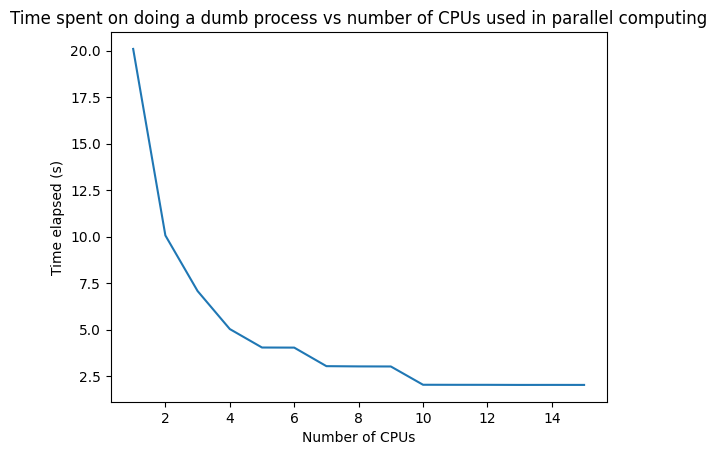

In [19]:
%%time

import numpy as np
np.__config__.show()
import os
import multiprocessing, pathos.multiprocessing
from tqdm.notebook import tqdm
import time
import matplotlib.pyplot as plt
import scipy.optimize as optimize

os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'

def experimental_data(a1, a2, a3, sigma, x):
    """ generation of fake experimental data with random error, given sigma"""

    y = a1**x + a2*x*x + a3*x*x*np.exp(x) + sigma*np.random.randn(len(x))

    return y


def resid(avec, x, y, sigma):

    """ the residual function """

    a0, a1, a2 = avec
    
    return (y - (a0 + a1*x + a2*x**2))/sigma


# Useless function fitting fake data which has different error bars (sigma)
def function(sigma):
    time.sleep(1)

    a0, a1, a2 = 1, 1, 1

    x = np.linspace(0, 100.0, N)
    y = experimental_data(3, 1, 0.1, sigma, x)

    afit, flag = optimize.leastsq(resid, [a0, a1, a2], args=(x, y, sigma))

    return 0

N=20
sigma = 5.0*np.ones(N)

maximum_cpus=multiprocessing.cpu_count()+2
time_elapsed=[]
cpus=[]
# N processes (N fittings each with different sigma in the experimental data), for loop to increase number of CPUS used
for i in range(maximum_cpus+1):
    parmap = pathos.multiprocessing.ProcessingPool(i+1).imap # this is a function that knows how many cores I want to use
    t0=time.time()
    result = list(tqdm(parmap(function, sigma),total=N))
    t1=time.time()

    time_elapsed.append(t1-t0)
    cpus.append(i+1)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("Time spent on doing a dumb process vs number of CPUs used in parallel computing")
ax.set_xlabel("Number of CPUs")
ax.set_ylabel("Time elapsed (s)")

ax.plot(cpus,time_elapsed)


## EXCERISES FROM LESSON 8

## Q1: I love pip 

- Take a piece of python code you wrote (for instance pick one of the exercises you've done for this class). 
- Turn it into a module
- Install it locally
- Deploy on pypi (only using the test-pypi server!)

<div class="alert alert-block alert-warning">
<span class="fa fa-flash"></span> VERY IMPORTANT
    
Both the pypi and test-pypi server are public on the web! Don't compromise your research by putting up something your competitors can use and steal your idea before you've published a paper on it!!! 

I turned my TICTACTOE exercise from the first lesson into a module that can be found at:

pip install -i https://test.pypi.org/simple/ Q1-L08==0.0.2

write "Q1_L08.play_game()"
to play it

## Q4: It's over Anakin, I have the high ground. I hate you! 

Pick a piece of your code that your really hate.  You hate it because it's soooooo slooooow. 
- Profile it.
- Find the culprit
- Rewrite that bottleneck making a better use of numpy arrays, or jitting it with Numba.
- Enjoy your faster code

**You underestimate my power**.

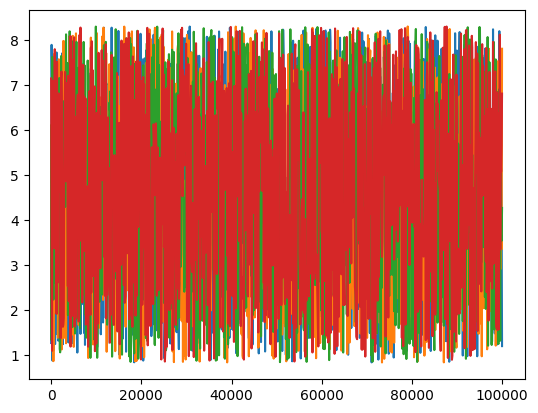

In [20]:
# ORIGINAL SCRIPT

import cProfile 
import numpy as np
import matplotlib.pyplot as plt
import math

def y_computation(data,N):

    y=[]
    for i in range(N):
        y.append(my_second_loop(data))

    return y

def my_second_loop(data):

    for x in data:
        z = 5**(x)*math.atan(x)
        y = math.exp(z)*np.random.uniform(1,10,4)

    return y

def my_plot(x,y):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x[:],y[:])

def function():

    N=int(10e2)

    data = np.random.normal(0,1,N)
    x = np.linspace(0,100*N,N)
    y=y_computation(data,N)

    my_plot(x,y)
    

with cProfile.Profile() as pr:
    function()

pr.dump_stats('exercise4.prof')

# snakeviz exercise4.prof

# Time elapsed: 5.01 s
# The bottleneck is the "my_second_loop" function.

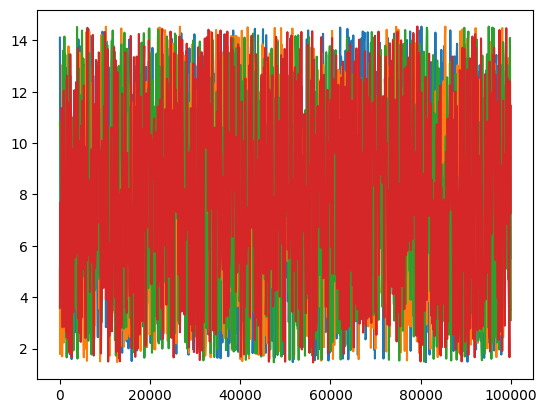

In [21]:
# NUMBA SCRIPT

import cProfile 
import numpy as np
from numba import njit
import matplotlib.pyplot as plt
import math

@njit
def y_computation(data,N):

    y=[]
    for i in range(N):
        y.append(my_second_loop(data))
    
    return y

@njit
def my_second_loop(data):

    for x in data:
        z = 5**(x)*math.atan(x)
        y = math.exp(z)*np.random.uniform(1,10,4)

    return y

def my_plot(x,y):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x[:],y[:])

def function():

    N=int(10e2)

    data = np.random.normal(0,1,N)
    x = np.linspace(0,100*N,N)
    y=y_computation(data,N)

    my_plot(x,y)
    

with cProfile.Profile() as pr:
    function()

pr.dump_stats('exercise4_numba.prof')

# snakeviz exercise4.prof

# Time elapsed: 0.434 s